In [1]:
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
import pandas as pd
import matplotlib
from matplotlib import style
style.use('seaborn')
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")

In [3]:
Base = automap_base()

In [4]:
Base.prepare(engine, reflect=True)

In [5]:
Base.classes.keys()

['measurements', 'stations']

In [6]:
Measurement = Base.classes.measurements
Station = Base.classes.stations

In [7]:
session = Session(engine)

In [8]:
precip_data = session.query(Measurement.date,Measurement.prcp).filter(Measurement.date > "2016-08-22").all()
precip_data

[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06', 0.0),
 ('2016-10-07', 0.0),
 ('2016-10-08', 

In [9]:
precip_data_df = pd.DataFrame(precip_data)
precip_data_df.head()

,date,prcp
0,2016-08-23,0.00
1,2016-08-24,0.08
2,2016-08-25,0.08
3,2016-08-26,0.00
4,2016-08-27,0.00


In [10]:
#precip_df = pd.read_sql_query("select date,prcp from measurements", engine)

In [11]:
precip_data_df.set_index('date', inplace=True)
precip_data_df.head()

,prcp
date,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00


#I messed around with the plots for far, far too long.  I tried to plot using the dataframe plot method first, as per the instructions.  I got close, but I couldn't figure out how to only choose a few of the dates on the x axis.  I spent a LOT of time trying to figure that out, but it was beyond my abilites. :)

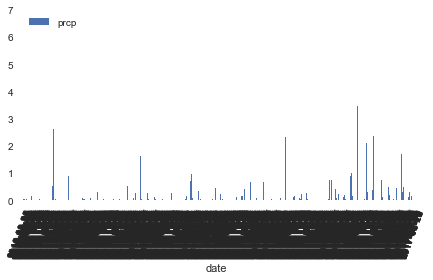

In [12]:
precip_data_df.plot(y='prcp', use_index = True, kind='bar')
plt.tight_layout()
plt.xticks(rotation=70)
plt.show()

#I then messed around with other plotting methods.  The bottom of the two attempts below is by far the closest, but it's plotting some lines across the graph that I don't understand and can't figure out where they came from. I may come back and play wit this some more, but at this point I feel like I need to move on to the rest of the assignment.

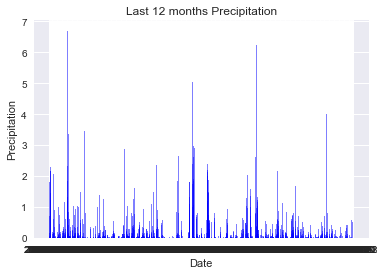

In [13]:
plt.bar(precip_data_df.index, precip_data_df['prcp'], color='b', alpha=0.5, align="edge")
plt.title("Last 12 months Precipitation")
plt.xlabel("Date")
plt.ylabel("Precipitation")
plt.show()

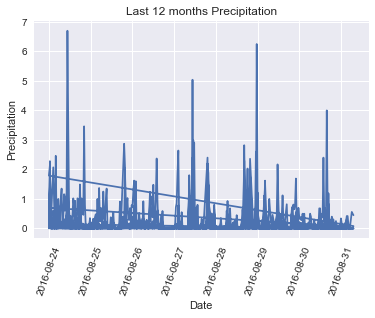

In [14]:
tick_spacing = 50

fig, ax = plt.subplots()
ax.plot(precip_data_df.index, precip_data_df['prcp'])
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
plt.xticks(rotation=70)
plt.title("Last 12 months Precipitation")
plt.xlabel("Date")
plt.ylabel("Precipitation")
plt.show()

In [15]:
precip_data_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


##Find number of stations

In [21]:
session.query(Measurement).group_by(Measurement.station).count()

9

In [20]:
session.query(Station).group_by(Station.station).count()

9

##List the stations and observation counts in descending order

In [33]:
session.query(Measurement.station, func.count(Measurement.tobs)).group_by(Measurement.station).order_by(func.count(Measurement.tobs).desc()).all()

[('USC00519281', 2772),
 ('USC00513117', 2696),
 ('USC00519397', 2685),
 ('USC00519523', 2572),
 ('USC00516128', 2484),
 ('USC00514830', 1937),
 ('USC00511918', 1932),
 ('USC00517948', 683),
 ('USC00518838', 342)]

##Which station has the highest number of observations?
USC00519281

In [66]:
observation_data=session.query(Measurement.tobs).filter_by(station='USC00519281').filter(Measurement.date > "2016-08-22")

In [67]:
obs_data = []
for row in observation_data:
    obs_data.append(row)
    
obs_data

[(77),
 (77),
 (80),
 (80),
 (75),
 (73),
 (78),
 (77),
 (78),
 (80),
 (80),
 (78),
 (78),
 (78),
 (73),
 (74),
 (80),
 (79),
 (77),
 (80),
 (76),
 (79),
 (75),
 (79),
 (78),
 (79),
 (78),
 (78),
 (76),
 (74),
 (77),
 (78),
 (79),
 (79),
 (77),
 (80),
 (78),
 (78),
 (78),
 (77),
 (79),
 (79),
 (79),
 (79),
 (75),
 (76),
 (73),
 (72),
 (71),
 (77),
 (79),
 (78),
 (79),
 (77),
 (79),
 (77),
 (78),
 (78),
 (78),
 (78),
 (77),
 (74),
 (75),
 (76),
 (73),
 (76),
 (74),
 (77),
 (76),
 (76),
 (74),
 (75),
 (75),
 (75),
 (75),
 (71),
 (63),
 (70),
 (68),
 (67),
 (77),
 (74),
 (77),
 (76),
 (76),
 (75),
 (76),
 (75),
 (73),
 (75),
 (73),
 (75),
 (74),
 (75),
 (74),
 (75),
 (73),
 (75),
 (73),
 (73),
 (74),
 (70),
 (72),
 (70),
 (67),
 (67),
 (69),
 (70),
 (68),
 (69),
 (69),
 (66),
 (65),
 (68),
 (62),
 (75),
 (70),
 (69),
 (76),
 (76),
 (74),
 (73),
 (71),
 (74),
 (74),
 (72),
 (71),
 (72),
 (74),
 (69),
 (67),
 (72),
 (70),
 (64),
 (63),
 (63),
 (62),
 (70),
 (70),
 (62),
 (62),
 (63),
 (65),

In [68]:
obs_data[0]

(77)

In [69]:
type(obs_data[0])

sqlalchemy.util._collections.result

In [70]:
obs_data_df=pd.DataFrame(obs_data)
obs_data_df.head()

,tobs
0,77
1,77
2,80
3,80
4,75


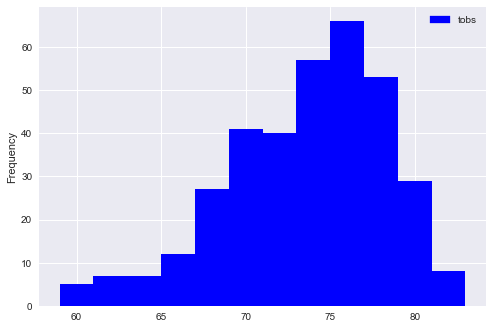

In [79]:
plt.hist(obs_data_df['tobs'],normed = False, bins=12, color='blue')
plt.ylabel('Frequency')
from matplotlib.patches import Rectangle
handles = [Rectangle((0,0),1,1,color='blue')]
labels= ["tobs"]
plt.legend(handles, labels)
plt.show()

In [138]:
def calc_temps (begin_date, end_date):
#reduce year by one
    date=begin_date.split('-')
    date[0]=str(int(date[0])-1)
    new_begin_date = '-'.join(date)
    date=end_date.split('-')
    date[0]=str(int(date[0])-1)
    new_end_date = '-'.join(date)
#query data and load into dataframe
    temp_data=session.query(Measurement.tobs).filter(Measurement.date >= new_begin_date).\
    filter(Measurement.date <= new_end_date)
    temperature_data = []
    for row in temp_data:
        temperature_data.append(row)
    temp_data_df=pd.DataFrame(temperature_data)
#find min, max, avg and return those values
    min_temp = temp_data_df['tobs'].min()
    max_temp = temp_data_df['tobs'].max()
    avg_temp = temp_data_df['tobs'].mean()
    return (min_temp,max_temp,avg_temp)

In [141]:
(min_temp, max_temp, avg_temp) = calc_temps('2018-01-01','2018-01-15')

In [142]:
print (min_temp, ' ', max_temp, ' ', avg_temp)

60   78   68.20253164556962


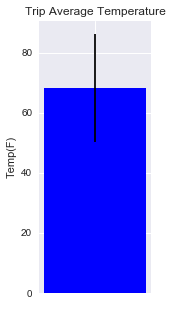

In [175]:
plt.figure(figsize=(2,5))
plt.bar(' ',avg_temp, color='b', yerr = (max_temp - min_temp))
plt.ylabel('Temp(F)')
plt.title('Trip Average Temperature')
plt.show()

In [189]:
def calc_rainfall (begin_date, end_date):
#reduce year by one
    date=begin_date.split('-')
    date[0]=str(int(date[0])-1)
    new_begin_date = '-'.join(date)
    date=end_date.split('-')
    date[0]=str(int(date[0])-1)
    new_end_date = '-'.join(date)
#query data and load into dataframe
    print(session.query(Measurement.station, func.sum(Measurement.prcp)).filter(Measurement.date >= new_begin_date).\
    filter(Measurement.date <= new_end_date).group_by(Measurement.station).all())


In [190]:
calc_rainfall('2018-01-01','2018-01-15')

[('USC00513117', 0.35), ('USC00514830', 0.63), ('USC00516128', 0.64), ('USC00519281', 0.21000000000000002), ('USC00519397', 0.0), ('USC00519523', 0.61)]


#Queries for FLASK api

In [25]:
precip_data = session.query(Measurement.date,Measurement.prcp).filter(Measurement.date > "2016-08-22").all()
precip_dict=[r._asdict() for r in precip_data]
precip_dict

[{'date': '2016-08-23', 'prcp': 0.0},
 {'date': '2016-08-24', 'prcp': 0.08},
 {'date': '2016-08-25', 'prcp': 0.08},
 {'date': '2016-08-26', 'prcp': 0.0},
 {'date': '2016-08-27', 'prcp': 0.0},
 {'date': '2016-08-28', 'prcp': 0.01},
 {'date': '2016-08-29', 'prcp': 0.0},
 {'date': '2016-08-30', 'prcp': 0.0},
 {'date': '2016-08-31', 'prcp': 0.13},
 {'date': '2016-09-01', 'prcp': 0.0},
 {'date': '2016-09-02', 'prcp': 0.0},
 {'date': '2016-09-03', 'prcp': 0.0},
 {'date': '2016-09-04', 'prcp': 0.03},
 {'date': '2016-09-07', 'prcp': 0.05},
 {'date': '2016-09-08', 'prcp': 0.0},
 {'date': '2016-09-09', 'prcp': 0.03},
 {'date': '2016-09-10', 'prcp': 0.0},
 {'date': '2016-09-11', 'prcp': 0.05},
 {'date': '2016-09-12', 'prcp': 0.0},
 {'date': '2016-09-13', 'prcp': 0.02},
 {'date': '2016-09-14', 'prcp': 1.32},
 {'date': '2016-09-15', 'prcp': 0.42},
 {'date': '2016-09-16', 'prcp': 0.06},
 {'date': '2016-09-17', 'prcp': 0.05},
 {'date': '2016-09-18', 'prcp': 0.0},
 {'date': '2016-09-19', 'prcp': 0.0},

In [31]:
stations = session.query(Station.station).all()
station_dict=[r._asdict() for r in stations]
station_dict

[{'station': 'USC00519397'},
 {'station': 'USC00513117'},
 {'station': 'USC00514830'},
 {'station': 'USC00517948'},
 {'station': 'USC00518838'},
 {'station': 'USC00519523'},
 {'station': 'USC00519281'},
 {'station': 'USC00511918'},
 {'station': 'USC00516128'}]

In [27]:
temp_data = session.query(Measurement.date,Measurement.tobs).filter(Measurement.date > "2016-08-22").all()
temp_dict=[r._asdict() for r in temp_data]
temp_dict

[{'date': '2016-08-23', 'tobs': 81},
 {'date': '2016-08-24', 'tobs': 79},
 {'date': '2016-08-25', 'tobs': 80},
 {'date': '2016-08-26', 'tobs': 79},
 {'date': '2016-08-27', 'tobs': 77},
 {'date': '2016-08-28', 'tobs': 78},
 {'date': '2016-08-29', 'tobs': 78},
 {'date': '2016-08-30', 'tobs': 79},
 {'date': '2016-08-31', 'tobs': 80},
 {'date': '2016-09-01', 'tobs': 81},
 {'date': '2016-09-02', 'tobs': 80},
 {'date': '2016-09-03', 'tobs': 79},
 {'date': '2016-09-04', 'tobs': 75},
 {'date': '2016-09-07', 'tobs': 76},
 {'date': '2016-09-08', 'tobs': 80},
 {'date': '2016-09-09', 'tobs': 79},
 {'date': '2016-09-10', 'tobs': 78},
 {'date': '2016-09-11', 'tobs': 76},
 {'date': '2016-09-12', 'tobs': 78},
 {'date': '2016-09-13', 'tobs': 78},
 {'date': '2016-09-14', 'tobs': 75},
 {'date': '2016-09-15', 'tobs': 79},
 {'date': '2016-09-16', 'tobs': 80},
 {'date': '2016-09-17', 'tobs': 79},
 {'date': '2016-09-18', 'tobs': 81},
 {'date': '2016-09-19', 'tobs': 77},
 {'date': '2016-09-20', 'tobs': 77},
 

In [9]:
begin_date="2018-01-01"
end_date="2018-01-15"
#reduce year by one
date=begin_date.split('-')
date[0]=str(int(date[0])-1)
new_begin_date = '-'.join(date)
date=end_date.split('-')
date[0]=str(int(date[0])-1)
new_end_date = '-'.join(date)
#query data and load into dataframe
temp_data=session.query(Measurement.tobs).filter(Measurement.date >= new_begin_date).\
filter(Measurement.date <= new_end_date)
temperature_data = []
for row in temp_data:
    temperature_data.append(row)
temp_data_df=pd.DataFrame(temperature_data)
#find min, max, avg and return those values
TMIN = temp_data_df['tobs'].min()
TMAX = temp_data_df['tobs'].max()
TAVG = temp_data_df['tobs'].mean()
temp_dic = {}
temp_dic["TMIN"]=TMIN
temp_dic["TMAX"]=TMAX
temp_dic["TAVG"]=TAVG
temp_list = []
temp_list.append(temp_dic)
temp_list

[{'TAVG': 68.20253164556962, 'TMAX': 78, 'TMIN': 60}]

In [10]:
type(temp_list)

list